In [56]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Import the time library and the datetime module from the datetime library
import time
from datetime import datetime
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [57]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [58]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1300)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1300)
lat_lngs = zip(lats, lngs)
lat_lngs

In [59]:
coordinates = list(lat_lngs)

In [60]:
from citipy import citipy

In [61]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

547

In [62]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | albany
Processing Record 2 of Set 1 | barrow
Processing Record 3 of Set 1 | kodiak
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | bluff
Processing Record 6 of Set 1 | bambanglipuro
Processing Record 7 of Set 1 | khanpur
Processing Record 8 of Set 1 | iranshahr
Processing Record 9 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 10 of Set 1 | puerto ayora
Processing Record 11 of Set 1 | upernavik
Processing Record 12 of Set 1 | alofi
Processing Record 13 of Set 1 | pisco
Processing Record 14 of Set 1 | samusu
City not found. Skipping...
Processing Record 15 of Set 1 | norman wells
Processing Record 16 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 17 of Set 1 | hobart
Processing Record 18 of Set 1 | jamestown
Processing Record 19 of Set 1 | punta arenas
Processing Record 20 of Set 1 | metro
Processing Record 21 of Set 1 | mataura
Pro

Processing Record 38 of Set 4 | sindand
City not found. Skipping...
Processing Record 39 of Set 4 | aksarka
Processing Record 40 of Set 4 | yeppoon
Processing Record 41 of Set 4 | vestmannaeyjar
Processing Record 42 of Set 4 | tura
Processing Record 43 of Set 4 | hithadhoo
Processing Record 44 of Set 4 | kushiro
Processing Record 45 of Set 4 | port elizabeth
Processing Record 46 of Set 4 | iquique
Processing Record 47 of Set 4 | carnarvon
Processing Record 48 of Set 4 | guerrero negro
Processing Record 49 of Set 4 | nantucket
Processing Record 50 of Set 4 | tual
Processing Record 1 of Set 5 | minab
Processing Record 2 of Set 5 | hualmay
Processing Record 3 of Set 5 | portland
Processing Record 4 of Set 5 | kamaishi
Processing Record 5 of Set 5 | praia da vitoria
Processing Record 6 of Set 5 | rayagada
Processing Record 7 of Set 5 | skalistyy
City not found. Skipping...
Processing Record 8 of Set 5 | faya
Processing Record 9 of Set 5 | nurlat
Processing Record 10 of Set 5 | fort nelson


Processing Record 31 of Set 8 | inuvik
Processing Record 32 of Set 8 | jimenez
Processing Record 33 of Set 8 | srednekolymsk
Processing Record 34 of Set 8 | oltedal
Processing Record 35 of Set 8 | lizzano
Processing Record 36 of Set 8 | manuk mangkaw
Processing Record 37 of Set 8 | ureki
Processing Record 38 of Set 8 | safaga
Processing Record 39 of Set 8 | ribas do rio pardo
Processing Record 40 of Set 8 | bowen
Processing Record 41 of Set 8 | takoradi
Processing Record 42 of Set 8 | grand centre
City not found. Skipping...
Processing Record 43 of Set 8 | milan
Processing Record 44 of Set 8 | chernyshevskiy
Processing Record 45 of Set 8 | lebu
Processing Record 46 of Set 8 | mahajanga
Processing Record 47 of Set 8 | biak
Processing Record 48 of Set 8 | ilulissat
Processing Record 49 of Set 8 | ekimchan
Processing Record 50 of Set 8 | abha
Processing Record 1 of Set 9 | sao filipe
Processing Record 2 of Set 9 | rorvik
Processing Record 3 of Set 9 | north bend
Processing Record 4 of Set

In [63]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Albany,42.6001,-73.9662,40.05,91,100,1.99,US,2023-01-12 19:42:07
1,Barrow,71.2906,-156.7887,-2.18,78,40,29.93,US,2023-01-12 19:42:07
2,Kodiak,57.7900,-152.4072,33.31,93,100,6.91,US,2023-01-12 19:42:08
3,Ushuaia,-54.8000,-68.3000,64.06,45,75,13.80,AR,2023-01-12 19:42:08
4,Bluff,-46.6000,168.3333,52.50,77,17,1.88,NZ,2023-01-12 19:42:10
5,Bambanglipuro,-7.9500,110.2833,77.56,79,88,3.22,ID,2023-01-12 19:42:10
6,Khanpur,28.6453,70.6567,53.92,47,0,2.86,PK,2023-01-12 19:42:11
7,Iranshahr,27.2025,60.6848,44.94,31,0,9.22,IR,2023-01-12 19:42:13
8,Puerto Ayora,-0.7393,-90.3518,82.36,88,25,5.01,EC,2023-01-12 19:42:13
9,Upernavik,72.7868,-56.1549,-1.16,61,100,7.72,GL,2023-01-12 19:42:14


In [64]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
final_city_data_df = city_data_df[new_column_order]
final_city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Albany,US,2023-01-12 19:42:07,42.6001,-73.9662,40.05,91,100,1.99
1,Barrow,US,2023-01-12 19:42:07,71.2906,-156.7887,-2.18,78,40,29.93
2,Kodiak,US,2023-01-12 19:42:08,57.7900,-152.4072,33.31,93,100,6.91
3,Ushuaia,AR,2023-01-12 19:42:08,-54.8000,-68.3000,64.06,45,75,13.80
4,Bluff,NZ,2023-01-12 19:42:10,-46.6000,168.3333,52.50,77,17,1.88


In [65]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [66]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

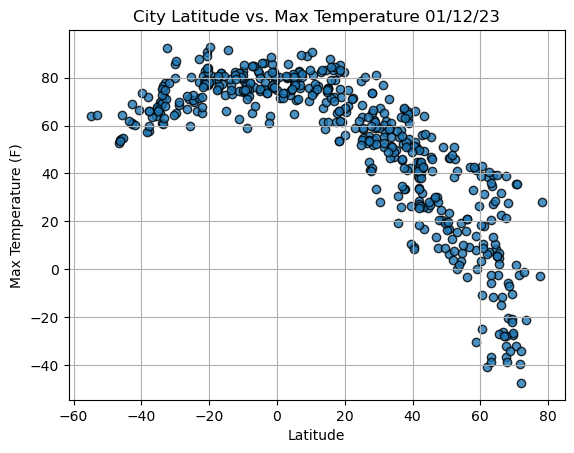

In [67]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

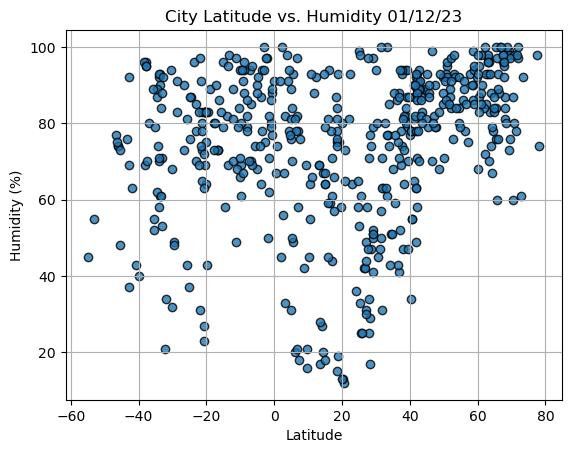

In [68]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

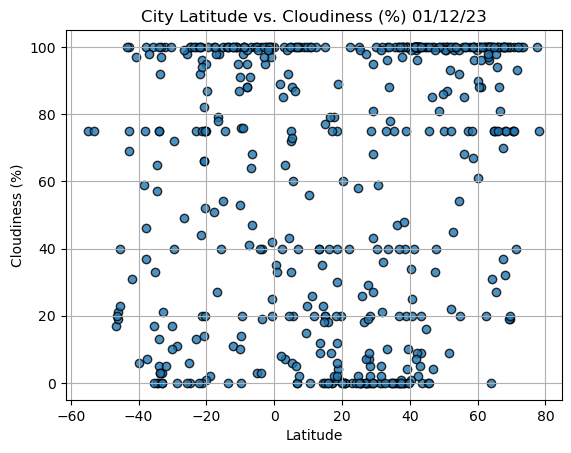

In [69]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

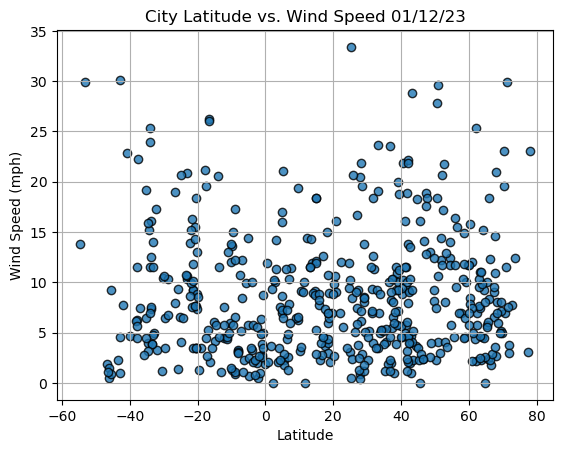

In [70]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [71]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Import linregress
    from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
    def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
        (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
        regress_values = x_values * slope + intercept
    # Get the equation of the line.
        line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
        plt.scatter(x_values,y_values)
        plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
        plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
        plt.title(title)
        plt.xlabel('Latitude')
        plt.ylabel(y_label)
        plt.show()

In [72]:
index13 = final_city_data_df.loc[13]
index13

City                       Hobart
Country                        AU
Date          2023-01-12 19:40:07
Lat                      -42.8794
Lng                      147.3294
Max Temp                    61.05
Humidity                       92
Cloudiness                     75
Wind Speed                   4.61
Name: 13, dtype: object

In [73]:
final_city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Albany,US,2023-01-12 19:42:07,42.6001,-73.9662,40.05,91,100,1.99
1,Barrow,US,2023-01-12 19:42:07,71.2906,-156.7887,-2.18,78,40,29.93
2,Kodiak,US,2023-01-12 19:42:08,57.7900,-152.4072,33.31,93,100,6.91
6,Khanpur,PK,2023-01-12 19:42:11,28.6453,70.6567,53.92,47,0,2.86
7,Iranshahr,IR,2023-01-12 19:42:13,27.2025,60.6848,44.94,31,0,9.22


In [74]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

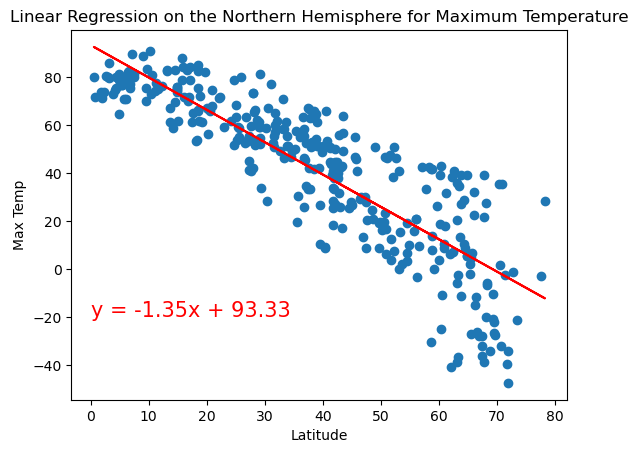

In [75]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

 # Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
        (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
        regress_values = x_values * slope + intercept
    # Get the equation of the line.
        line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
        plt.scatter(x_values,y_values)
        plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
        plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
        plt.title(title)
        plt.xlabel('Latitude')
        plt.ylabel(y_label)
        plt.show()

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(0,-20))

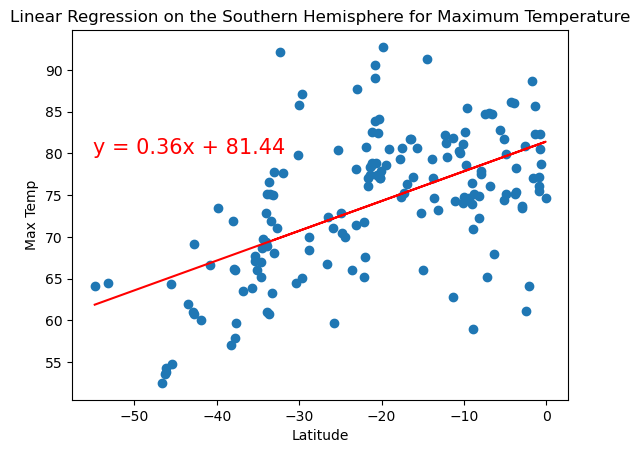

In [76]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-55,80))

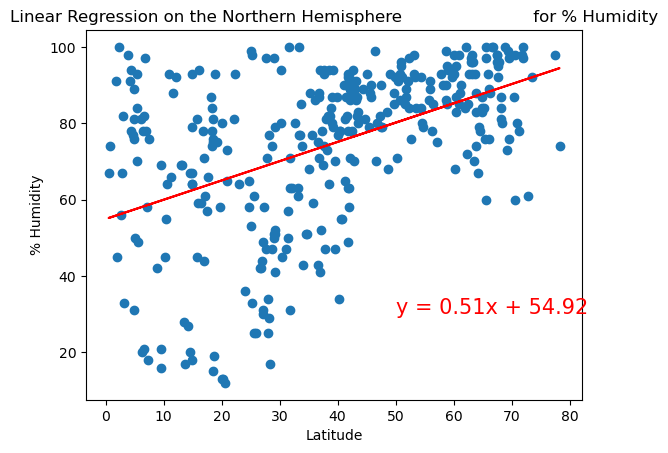

In [77]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(50,30))

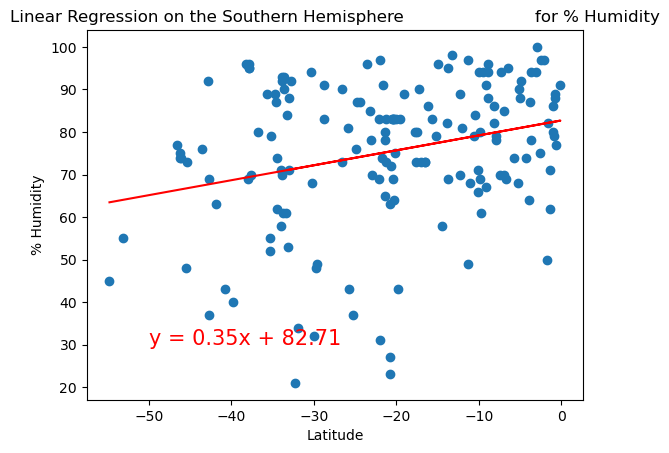

In [78]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,30))

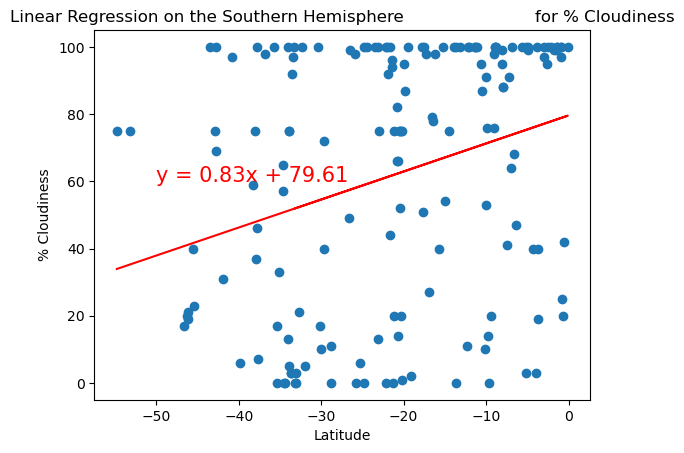

In [79]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

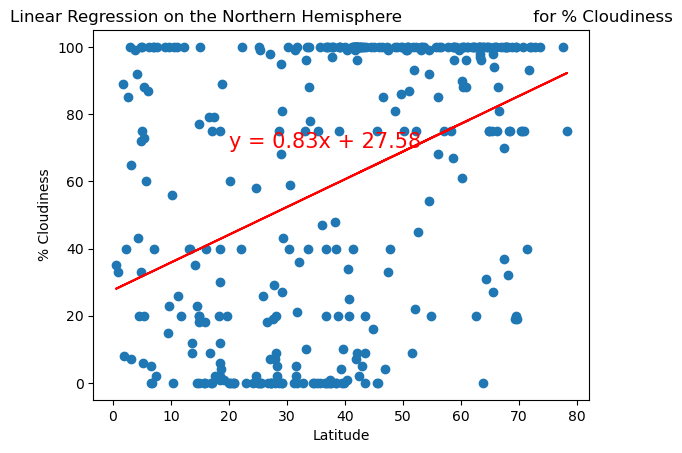

In [80]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(20,70))

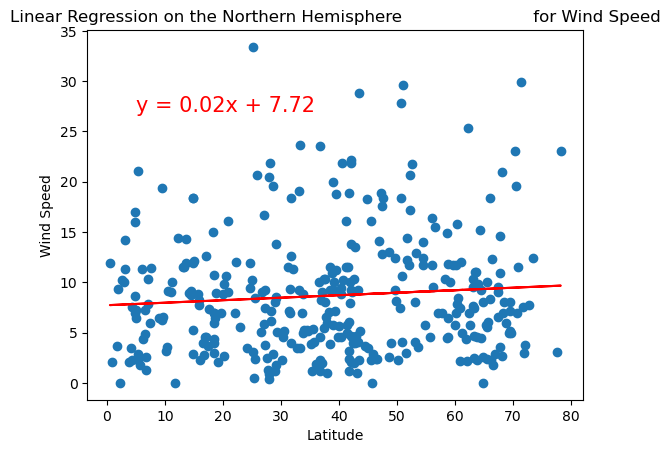

In [81]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(5,27))

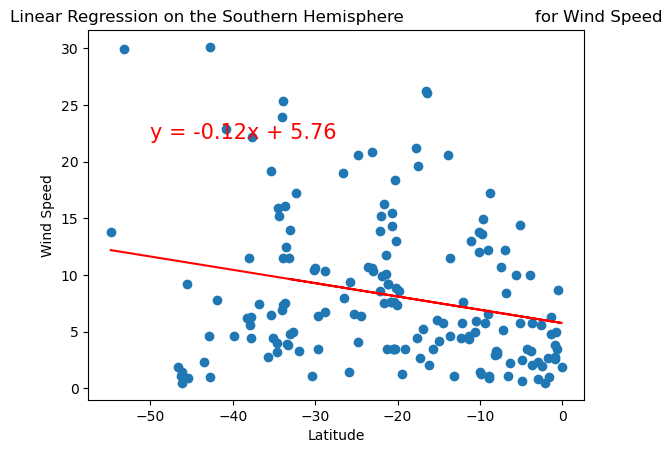

In [82]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,22))